# Superviced Learning - Classification Overview

Supervised Learning adalah metode machine learning di mana kita melatih model menggunakan data yang sudah punya jawaban (label).<br>


target bisa dimana aja tempatnya tapi seharusnya berada di ujung, karena saat membuat model, data target akan dipisahkan dengan data kolom lainnya. dimanapun letaknya kita perlu mengambil data target itu<br>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# scikit-learn model
from sklearn.linear_model import LogisticRegression

# min-max scaling
from sklearn.preprocessing import MinMaxScaler

# model evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('heart.csv')

df.info()
# check tipe data nya

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [3]:
df.isna().sum()
# dari awal emang sudah gada missing value

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

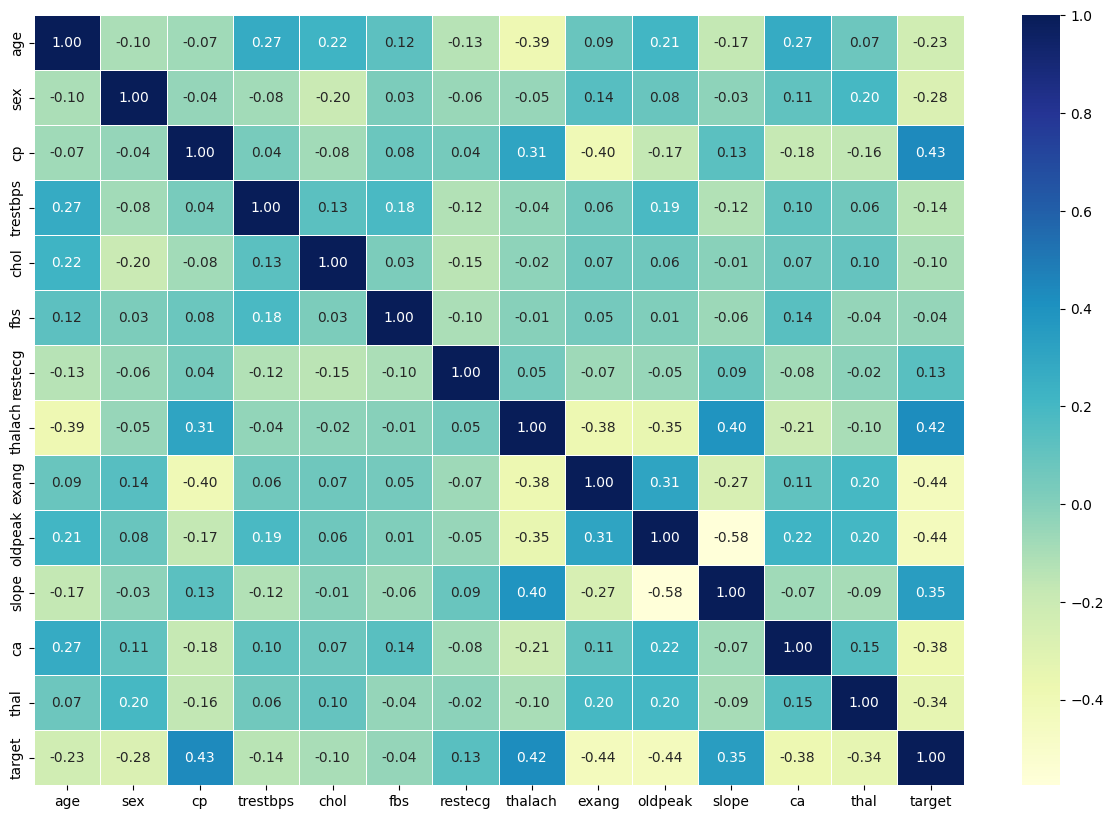

In [ ]:




corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt='.2f', cmap='YlGnBu')

# Split Train and Test Data

1. data sudah bersih
2. Scaling (optional tapi direkomendasikan) #MinMaxScalling
3. split data nya
4. milih model
5. train model
6. evaluasi model

In [5]:
x = df.drop(['target'], axis=1)  
y = df['target']

In [6]:
X_train, X_test, Y_train , Y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [7]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

# Milih Model

In [8]:
model = LogisticRegression(max_iter=1000)

# bisa iterasi maximal 1000 kali, tapi ini membuat modelnya capek
# modelnya jadi menghafal bukan belajar = overfitting

In [9]:
model.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [10]:
y_pred = model.predict(X_test)

# Hyperparameter  Tuning

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000))
])
grid = GridSearchCV(pipeline, param_grid={'model__C':[0.01,0.1,1,10,100],
                                        'model__solver':['liblinear','lbfgs']},
                                        cv=5, scoring='accuracy')
grid.fit(X_train, Y_train)


,estimator,Pipeline(step..._iter=1000))])
,param_grid,"{'model__C': [0.01, 0.1, ...], 'model__solver': ['liblinear', 'lbfgs']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [12]:
best_model = grid.best_estimator_

In [13]:
y_prediksi = best_model.predict(X_test)

In [14]:
report = classification_report(Y_test, y_prediksi, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report
# karena ada yg dibawah 80 maka model ini dikatakan JELEK, range 85-95 dianggap bagus
# maka dari itu untuk mencari model yg bagus, lakukan experiment untuk mencari nya

,precision,recall,f1-score,support
0,0.848837,0.715686,0.776596,102.000000
1,0.756303,0.873786,0.810811,103.000000
accuracy,0.795122,0.795122,0.795122,0.795122
macro avg,0.802570,0.794736,0.793703,205.000000
weighted avg,0.802344,0.795122,0.793787,205.000000


### Evaluation Metrics for Classification
<img src="predicted_values.jpg" style="width:700px;height:auto;">

materi ini ada terpisah sendiri dan ini sulit pencernaanya. ini hanya perkenalan saja

# Sample Data

In [15]:
sample = X_test.iloc[0:5]
sample


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
527,62,0,0,124,209,0,1,163,0,0.0,2,0,2
359,53,0,2,128,216,0,0,115,0,0.0,2,0,0
447,55,1,0,160,289,0,0,145,1,0.8,1,1,3
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2
621,48,1,0,130,256,1,0,150,1,0.0,2,2,3


In [16]:
model.predict(sample)
# melihat yg di sample itu bener seperti yg di predict

array([1, 1, 0, 1, 0])

In [17]:
Y_test[0:5]

527    1
359    1
447    0
31     1
621    0
Name: target, dtype: int64

In [18]:
# feature target, sebuah target yg ada di data kita
# target bisa diganti dengan nama "y", target itu sebuah jawaban
# supaya kita tau ketika data, model kita bisa tau target kita 0 atau 1,semua fitur kecuali target akan - gada lanjutan
# diliat karakteristiknya
# target itu diisi sama org yang ahli dibidang nya

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled


array([[0.47916667, 1.        , 0.        , ..., 0.5       , 1.        ,
        0.        ],
       [0.5       , 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.85416667, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.375     , 1.        , 0.        , ..., 0.25      , 0.66666667,
        0.        ],
       [0.4375    , 0.        , 0.        , ..., 0.        , 0.66666667,
        1.        ],
       [0.52083333, 1.        , 0.        , ..., 0.25      , 1.        ,
        0.        ]], shape=(1025, 14))